### <center>  Grupo 6 </center>

<center>David Alejandro Rojas Castro - da.rojasc123@uniandes.edu.co </center>
<center>Camila Malagón Suarez - c.malagons@uniandes.edu.co</center>
<center>Luis David Gutierrez - ld.gutierrezl1@uniandes.edu.co</center>
<center>David Zapata Vásquez - d.zapata11@uniandes.edu.co</center>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`. 

In [1]:
from sklearn.datasets import fetch_olivetti_faces

# Cargar los datos de la base de datos Olivetti Faces
data = fetch_olivetti_faces()

# Verificar las claves disponibles en el dataset
print(data.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


### Carga de datos

Para la carga de los datos, utilizamos la librería `scikit-learn` y su función `fetch_olivetti_faces`, que nos permite acceder directamente a la base de datos de rostros Olivetti. Al cargar los datos, observamos que el diccionario que contiene la base de datos tiene las siguientes claves:

- **data:** Array que contiene los datos de las imágenes aplanadas en un solo vector.
- **images:** Array que contiene las imágenes en su forma original, más adelante se detalla la forma de las imágenes.
- **target:** Array que contiene las etiquetas que corresponden a los 40 individuos.
- **DESCR:** Una cadena de texto que proporciona una descripción del dataset.

Estos elementos nos proporcionan toda la información necesaria para proceder con el análisis y la clasificación de las imágenes de los rostros.

### 2.  Análisis preliminar 

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [3]:
# Exploración de las dimensiones de los datos
n_samples, n_features = data.data.shape
image_shape = data.images.shape

print(f"El dataset contiene {n_samples} imágenes, cada una con {n_features} características.")
print(f"Las imágenes tienen la forma original de {image_shape[1]}x{image_shape[2]} píxeles.")
print(f"El dataset incluye {len(set(data.target))} individuos.")

El dataset contiene 400 imágenes, cada una con 4096 características.
Las imágenes tienen la forma original de 64x64 píxeles.
El dataset incluye 40 individuos.


El dataset Olivetti Faces contiene un total de **400 imágenes**, cada una representada por **4096 características**, correspondientes a los píxeles de una imagen en escala de grises de **64x64 píxeles**. Estas imágenes están organizadas en **40 clases diferentes**, lo que significa que tenemos 10 imágenes por cada individuo. Por lo tanto podemos concluir que este dataset es adecuado para pruebas de algoritmos de reconocimiento facial y clustering.

#### 2.2. Genere una figura con una imágen de cada uno de los individuos

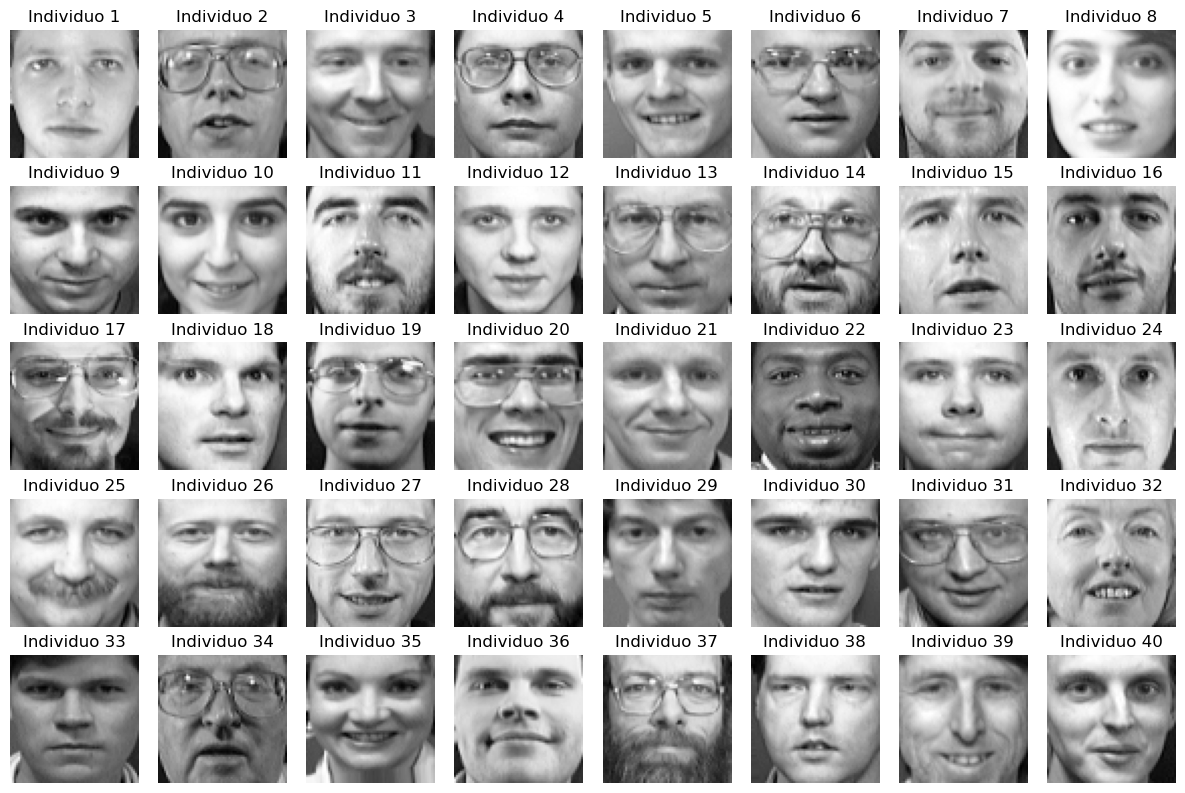

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Número de individuos
n_individuals = len(set(data.target))

# Crear una figura con 40 subplots (5 filas, 8 columnas)
fig, axes = plt.subplots(5, 8, figsize=(12, 8))

# Iterar sobre cada individuo y mostrar una imagen representativa
for i in range(n_individuals):
    # Encontrar el índice de la primera imagen del individuo i
    ax = axes[i // 8, i % 8]
    ax.imshow(data.images[data.target == i][0], cmap='gray')
    ax.axis('off')
    ax.set_title(f"Individuo {i+1}")

plt.tight_layout()
plt.show()

Para visualizar una imagen representativa de cada uno de los **40 individuos** en el dataset Olivetti Faces, se generó una figura que muestra una imagen por individuo. Se utilizó un layout de 5 filas por 8 columnas para acomodar las **40 imágenes**. Cada subplot muestra la primera imagen disponible para cada individuo, lo que nos permite observar las variaciones en la apariencia de los sujetos bajo diferentes condiciones de iluminación, expresión facial. uso de gafas y otros detalles.

Esta visualización es útil para entender mejor la diversidad presente en el dataset antes de aplicar técnicas de clustering como K-medias y K-medoides.

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen. 

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Estandarizar los valores de los píxeles
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.data)

# Crear un DataFrame con los datos estandarizados
df = pd.DataFrame(data_scaled)
df['target'] = data.target

# Mostrar las primeras filas del DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,1.663787,1.598077,1.621725,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,0
1,0.301499,0.194640,0.185686,0.203914,0.213404,0.290404,0.361849,0.355027,0.311534,0.180529,...,-1.157252,-1.249632,-1.096954,-1.007794,-0.982782,-0.938375,-0.898275,-0.876585,-0.873362,0
2,-0.454109,-0.176519,0.079458,0.054095,0.169528,0.383129,0.361849,0.248272,0.255478,0.151713,...,-1.293754,-0.999033,-1.162729,-1.141196,-1.004644,-0.980749,-0.964354,-0.899118,-0.873362,0
3,-1.118128,-1.268161,-1.450221,-1.679522,-1.936544,-2.236356,-2.262576,-1.566562,-1.230019,-1.116164,...,1.481785,1.620859,1.753274,2.082678,2.143408,2.197309,2.295495,2.390682,2.379127,0
4,0.553368,0.587631,0.546860,0.546357,0.498601,0.568579,0.436125,0.435093,0.395618,0.382236,...,-1.134501,-1.021815,-0.965405,-0.874393,-0.851614,-0.811252,-0.766119,-0.763921,-0.758838,0


Para preparar los datos para su posterior análisis, hemos transformado las imágenes en un DataFrame de `Pandas`. Cada fila en este DataFrame representa una imagen, y cada columna contiene los **valores estandarizados** (Con `StandardScaler`) de los píxeles (nivel de gris) de la imagen original. Este proceso de estandarización es crucial para garantizar que cada característica (píxel) tenga una media de 0 y una desviación estándar de 1, lo que facilita la aplicación de algoritmos de clustering.

Además, hemos añadido una columna adicional denominada `target`, que contiene las etiquetas correspondientes a cada uno de los 40 individuos. Este DataFrame es ahora la base que utilizaremos para aplicar los algoritmos de K-medias y K-medoides en las siguientes etapas del análisis.

### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior. Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [11]:
from sklearn.cluster import KMeans

# Implementar K-medias
kmeans = KMeans(n_clusters=40, random_state=123, n_init=10)
kmeans.fit(df.drop('target', axis=1))

# Asignar las etiquetas predichas al DataFrame
df['kmeans_labels'] = kmeans.labels_

# Mostrar las primeras filas del DataFrame con las etiquetas de K-medias
df.head()

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,target,kmeans_labels
0,-0.499903,-0.351181,-0.302961,-0.395361,-0.137608,0.104953,0.213296,0.194895,0.171393,0.065267,...,1.598077,1.621725,0.726428,-1.092090,-0.959562,-0.898275,-0.831520,-0.850457,0,6
1,0.301499,0.194640,0.185686,0.203914,0.213404,0.290404,0.361849,0.355027,0.311534,0.180529,...,-1.249632,-1.096954,-1.007794,-0.982782,-0.938375,-0.898275,-0.876585,-0.873362,0,19
2,-0.454109,-0.176519,0.079458,0.054095,0.169528,0.383129,0.361849,0.248272,0.255478,0.151713,...,-0.999033,-1.162729,-1.141196,-1.004644,-0.980749,-0.964354,-0.899118,-0.873362,0,6
3,-1.118128,-1.268161,-1.450221,-1.679522,-1.936544,-2.236356,-2.262576,-1.566562,-1.230019,-1.116164,...,1.620859,1.753274,2.082678,2.143408,2.197309,2.295495,2.390682,2.379127,0,10
4,0.553368,0.587631,0.546860,0.546357,0.498601,0.568579,0.436125,0.435093,0.395618,0.382236,...,-1.021815,-0.965405,-0.874393,-0.851614,-0.811252,-0.766119,-0.763921,-0.758838,0,6


Aplicamos el algoritmo de K-medias sobre los datos estandarizados, utilizando `n_clusters=40` para intentar agrupar las imágenes en 40 clusters diferentes, cada uno correspondiente a un individuo. El parámetro `random_state=123` asegura que los resultados sean reproducibles, y `n_init=10` indica que el algoritmo se ejecutará 10 veces con diferentes centroides iniciales, seleccionando el resultado con la menor inercia.

Una vez entrenado el modelo, hemos agregado las etiquetas predichas (`kmeans_labels`) al DataFrame. Estas etiquetas indican a qué cluster asignó K-medias cada imagen, lo que nos permitirá evaluar la precisión del algoritmo en los siguientes pasos.

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos. 

In [13]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Para evaluar la precisión, necesitamos comparar las etiquetas de clustering con las etiquetas originales.
# Dado que K-medias no garantiza que el número de cluster coincida con el número de clase, usaremos el modo para asignar las etiquetas.
labels = np.zeros_like(kmeans.labels_)

for i in range(40):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(data.target[mask])[0]

# Calcular la precisión
accuracy = accuracy_score(data.target, labels)
print(f"La precisión del algoritmo K-medias es: {accuracy:.2f}")

La precisión del algoritmo K-medias es: 0.66


C:\Users\david\AppData\Local\Temp\ipykernel_14856\4103275435.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(data.target[mask])[0]


Para evaluar la precisión del algoritmo de K-medias, comparamos las etiquetas predichas con las etiquetas originales de los individuos. Sin embargo, dado que K-medias asigna los clusters sin considerar las etiquetas originales, es posible que las imágenes de una misma persona queden distribuidas en diferentes clusters, o que un solo cluster contenga imágenes de varias personas.

Para superar esta limitación y realizar una comparación justa, utilizamos el **modo**. El modo es el valor más frecuente en un conjunto de datos. En este contexto, lo que hacemos es asignar a cada cluster la etiqueta más frecuente entre las imágenes que contiene. Por ejemplo, si el cluster 0 contiene principalmente imágenes de la persona etiquetada con "5", asignamos la etiqueta "5" a todas las imágenes de ese cluster.

Este proceso de "realinear" las etiquetas predichas con las etiquetas originales nos permite calcular la precisión del algoritmo, es decir, qué tan bien logró K-medias agrupar imágenes de la misma persona en el mismo cluster.

Después de aplicar esta técnica, la precisión del modelo de K-medias en este caso fue del **66%**. Esto indica que el modelo pudo agrupar correctamente aproximadamente dos tercios de las imágenes según su etiqueta original, lo cual es un resultado interesante considerando la complejidad de las imágenes y las variaciones presentes en el dataset.

#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores. Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró. 

In [15]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad, reteniendo el 95% de la varianza
pca = PCA(n_components=0.95, whiten=True, random_state=123)
data_pca = pca.fit_transform(df.drop(['target', 'kmeans_labels'], axis=1))

# Aplicar K-medias nuevamente sobre los datos transformados
kmeans_pca = KMeans(n_clusters=40, random_state=123, n_init=10)
kmeans_pca.fit(data_pca)

# Asignar las etiquetas predichas al DataFrame
df['kmeans_pca_labels'] = kmeans_pca.labels_

# Evaluar la precisión después de aplicar PCA
labels_pca = np.zeros_like(kmeans_pca.labels_)
for i in range(40):
    mask = (kmeans_pca.labels_ == i)
    labels_pca[mask] = mode(data.target[mask])[0]

accuracy_pca = accuracy_score(data.target, labels_pca)
print(f"La precisión del algoritmo K-medias después de PCA es: {accuracy_pca:.2f}")

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


La precisión del algoritmo K-medias después de PCA es: 0.45


C:\Users\david\AppData\Local\Temp\ipykernel_14856\3916137014.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_pca[mask] = mode(data.target[mask])[0]


En el paso anterior, aplicamos **PCA (Análisis de Componentes Principales)** para reducir la dimensionalidad de los datos, reteniendo el 95% de la varianza original. PCA es una técnica que puede ayudar a eliminar el ruido y las redundancias en los datos, lo que en teoría podría permitir que algoritmos como K-medias funcionen de manera más eficiente.

Sin embargo, después de aplicar PCA y volver a entrenar el modelo de K-medias, observamos que la precisión del modelo disminuyó al **45%**. Esto sugiere que, en este caso particular, la reducción de dimensionalidad con PCA pudo haber eliminado características importantes que eran necesarias para diferenciar adecuadamente entre los diferentes individuos en el dataset. 

Este resultado es un recordatorio de que PCA, aunque útil en muchos casos, no siempre mejora el rendimiento de un modelo de clustering, especialmente en datasets complejos como el de reconocimiento facial, donde los detalles sutiles en las imágenes son críticos para un buen desempeño.

A continuación, exploraremos el uso del algoritmo **K-medoides** para ver si podemos obtener mejores resultados en la agrupación de las imágenes.

#### 3.4. Utilice ahora el algoritmo por  K-medoides (use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [42]:
## pip install scikit-learn-extra

     -------------------------------------- 343.0/343.0 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
from sklearn_extra.cluster import KMedoids

# Implementar K-medoides con los mismos parámetros que usamos para K-medias
kmedoids = KMedoids(n_clusters=40, random_state=123)
kmedoids.fit(df.drop(['target', 'kmeans_labels', 'kmeans_pca_labels'], axis=1))

# Asignar las etiquetas predichas al DataFrame
df['kmedoids_labels'] = kmedoids.labels_

# Evaluar la precisión de K-medoides
labels_kmedoids = np.zeros_like(kmedoids.labels_)
for i in range(40):
    mask = (kmedoids.labels_ == i)
    labels_kmedoids[mask] = mode(data.target[mask])[0]

accuracy_kmedoids = accuracy_score(data.target, labels_kmedoids)
print(f"La precisión del algoritmo K-medoides es: {accuracy_kmedoids:.2f}")

La precisión del algoritmo K-medoides es: 0.44


C:\Users\david\AppData\Local\Temp\ipykernel_14856\2041459484.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_kmedoids[mask] = mode(data.target[mask])[0]


El algoritmo de **K-medoides** es similar a K-medias, pero en lugar de utilizar la media de los puntos dentro de un cluster como centroide, utiliza uno de los puntos reales del conjunto de datos, lo que lo hace más robusto frente a valores atípicos.

Aplicamos K-medoides al dataset con 40 clusters, manteniendo los mismos parámetros que usamos para K-medias para asegurar una comparación justa. Luego, evaluamos la precisión del modelo utilizando el mismo enfoque de remapeo de etiquetas mediante el modo, como lo hicimos anteriormente.

La precisión obtenida con K-medoides fue del **44%**, lo que es inferior a la precisión obtenida con K-medias (66%) y similar a la obtenida con K-medias después de aplicar PCA (45%).

Este resultado sugiere que, aunque K-medoides es más robusto frente a valores atípicos, en este caso particular no superó el rendimiento de K-medias. Esto podría deberse a la estructura compleja de los datos, donde los clusters pueden no ser fácilmente representables por un solo punto real del conjunto de datos. Además, la alta dimensionalidad del dataset podría haber influido en el rendimiento de K-medoides.

En resumen, K-medias parece haber sido más efectivo para agrupar las imágenes en clusters coherentes en este conjunto de datos específico.

### 4. Número de clusters óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

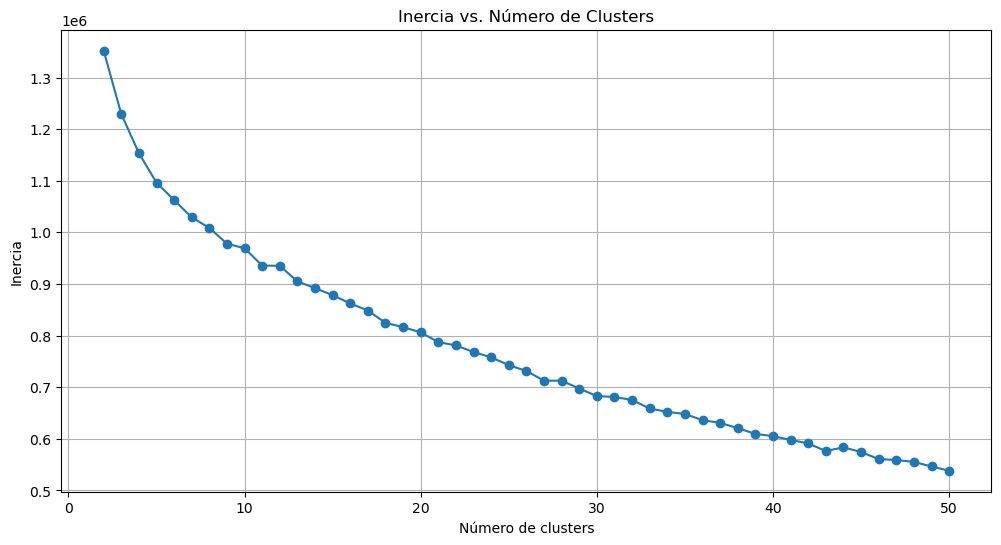

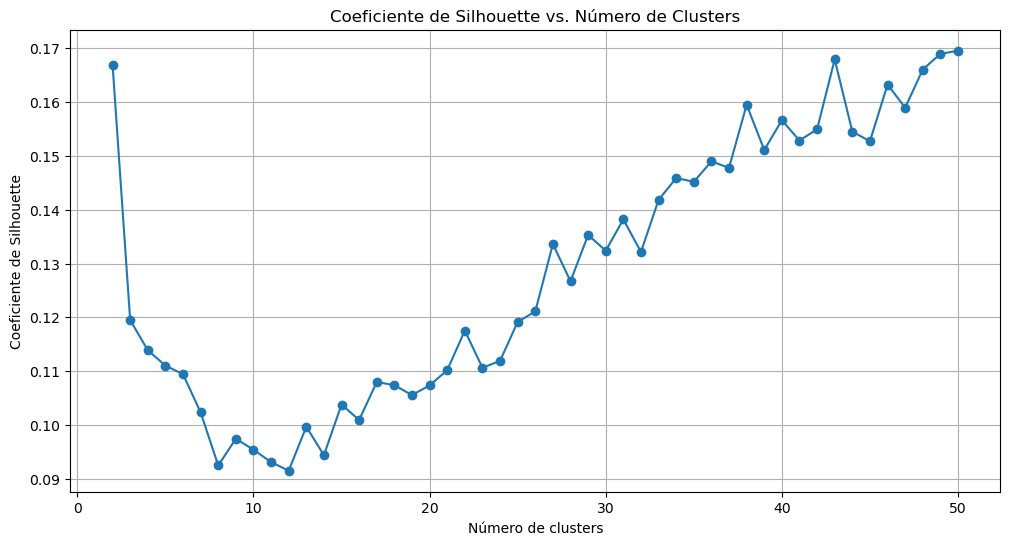

In [19]:
from sklearn.metrics import silhouette_score

# Probar diferentes números de clusters
range_n_clusters = list(range(2, 51))
inertias = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=10)
    kmeans.fit(df.drop(['target', 'kmeans_labels', 'kmeans_pca_labels', 'kmedoids_labels'], axis=1))
    
    # Guardar la inercia
    inertias.append(kmeans.inertia_)
    
    # Calcular y guardar el coeficiente de Silhouette
    silhouette_avg = silhouette_score(df.drop(['target', 'kmeans_labels', 'kmeans_pca_labels', 'kmedoids_labels'], axis=1), kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Mostrar los resultados
import matplotlib.pyplot as plt

# Gráfico de la inercia
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Inercia vs. Número de Clusters')
plt.grid(True)
plt.show()

# Gráfico del coeficiente de Silhouette
plt.figure(figsize=(12, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette vs. Número de Clusters')
plt.grid(True)
plt.show()

Para determinar si 40 es el número óptimo de clusters, hemos calculado la inercia y el coeficiente de Silhouette para diferentes números de clusters, desde 2 hasta 50.

- **Inercia:** Observamos un "codo" en la curva de inercia alrededor de 10-15 clusters, lo que sugiere que añadir más clusters después de este punto ofrece beneficios marginales en términos de reducción de inercia.

- **Coeficiente de Silhouette:** Los valores del coeficiente de Silhouette son generalmente bajos, lo que indica que los clusters no están claramente definidos. Aunque el valor del coeficiente aumenta hacia 50 clusters, los resultados no son significativamente mejores que con un número menor de clusters.

En resumen, aunque originalmente usamos 40 clusters (correspondiente al número de individuos), la inercia sugiere que podríamos considerar un número menor, alrededor de 10-15 clusters. Sin embargo, dado que el coeficiente de Silhouette no proporciona una clara ventaja para un número específico, podríamos concluir que 40 clusters sigue siendo una opción razonable, pero no necesariamente óptima.
